In [62]:
import subprocess as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# D103

In [165]:
shared_cmd="grep '      2 I' data/dedup_cross-year_clonotype_pools/D103-2016-D103-2021_dedup_pool_vj-aa_with-counts.txt"


p = sp.Popen(shared_cmd, stdout=sp.PIPE, stderr=sp.PIPE, shell=True, encoding='utf8')
stdout, stderr = p.communicate()

shared=stdout.split('\n')[:-1]
shared=[s[8:] for s in shared]

In [141]:
with open('./data/shared_unshared_cdr3aa/D103-shared-cdr3aa', 'w') as file:
    for s in shared:
        if len(s.split()[2])==13:
            file.write(s.split()[2]+'\n')
        else:
            continue

In [149]:
unshared_cmd="grep '      1 I' data/dedup_cross-year_clonotype_pools/D103-2016-D103-2021_dedup_pool_vj-aa_with-counts.txt"


p = sp.Popen(unshared_cmd, stdout=sp.PIPE, stderr=sp.PIPE, shell=True, encoding='utf8')
stdout, stderr = p.communicate()

unshared=stdout.split('\n')[:-1]
unshared=[us[8:] for us in unshared]

In [143]:
with open('./data/shared_unshared_cdr3aa/D103-unshared-cdr3aa', 'w') as file:
    for s in unshared:
        if len(s.split()[2])==13:
            file.write(s.split()[2]+'\n')
        else:
            continue

In [151]:
from collections import Counter

In [152]:
len_data={'shared': Counter([len(s.split()[2]) for s in shared]), 'unshared': Counter([len(s.split()[2]) for s in unshared])}

In [153]:
len_df=pd.DataFrame(len_data).fillna(0)

len_df=len_df/len_df.sum()

In [154]:
len_df.sort_index(inplace=True)

In [155]:
def step(x, ys, colors=None, labels=None, figfile=None, figsize=(8, 3), color=[0.3] * 3,
                ylim=None, xlim=None, xtick_interval=1, linewidth=1.25, xlabel=None, show_legend=False):
    
    sns.set_style('white')

    # set some reasonable defaults (if not provided)
    if xlim is None:
        xlim = (-0.5, len(xs))
    if ylim is None:
        ylim = (0, 1.1 * max([max(y) for y in ys]))
    if colors is None:
        colors = sns.color_palette('muted', len(ys))
    if labels is None:
        labels = [None] * len(ys)

    # plot the data
    plt.figure(figsize=figsize)
    for y, color, label in zip(ys, colors, labels):
        plot = plt.step(x, y, where='mid', color=color, linewidth=linewidth, label=label)
        plt.fill_between(x, y, step='mid', color=color, alpha=0.1)

    # axis labels and ticks
    ax = plt.gca()
    ax.set_ylabel('Frequency', size=14, labelpad=8)
    if xlabel is not None:
        ax.set_xlabel(xlabel, size=14, labelpad=8)
    plt.xticks(x[::xtick_interval], x[::xtick_interval], size='medium')
    ax.tick_params(axis='x', which='major', labelsize=12)
    ax.tick_params(axis='y', which='major', labelsize=12, length=6, width=1.25, pad=12, right=False)
    
    # hide top, left and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # axis limits
    ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)
    
    # legend
    if show_legend:
        plt.legend(fontsize=12, handlelength=1)
    
    # save or show
    plt.tight_layout()
    if figfile is not None:
        plt.savefig(figfile)
    else:
        plt.show()

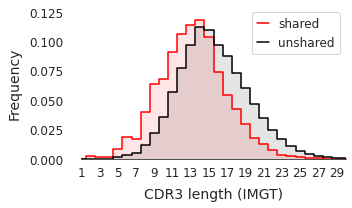

In [156]:
x = len_df.index.values
labels = len_df.columns.values
ys = [list(len_df[l]) for l in labels]
colors = ['r', 'k']

step(x, ys, colors=colors, labels=labels, xlim=[1, 30], xtick_interval=2,
     figsize=(5, 3), linewidth=1.5, xlabel='CDR3 length (IMGT)', show_legend=True,
      figfile='../make_figures/figures/D103_shared_CDR3len_step-plot.pdf'
    )

In [105]:
D103_2016_total=2917577
D103_2021_total=1536004
D103_shared=len(shared)


In [106]:
(D103_2016_total-D103_shared)

2884743

In [107]:
(D103_2021_total-D103_shared)

1503170

In [109]:
(D103_shared/(D103_2016_total))*100

1.1253858938427332

# 327059

In [157]:
shared_cmd="grep '      2 I' data/dedup_cross-year_clonotype_pools/327059-2016-327059-2020_dedup_pool_vj-aa_with-counts.txt"


p = sp.Popen(shared_cmd, stdout=sp.PIPE, stderr=sp.PIPE, shell=True, encoding='utf8')
stdout, stderr = p.communicate()

shared=stdout.split('\n')[:-1]
shared=[s[8:] for s in shared]

In [145]:
with open('./data/shared_unshared_cdr3aa/327059-shared-cdr3aa', 'w') as file:
    for s in shared:
        if len(s.split()[2])==13:
            file.write(s.split()[2]+'\n')
        else:
            continue

In [158]:
unshared_cmd="grep '      1 I' data/dedup_cross-year_clonotype_pools/327059-2016-327059-2020_dedup_pool_vj-aa_with-counts.txt"


p = sp.Popen(unshared_cmd, stdout=sp.PIPE, stderr=sp.PIPE, shell=True, encoding='utf8')
stdout, stderr = p.communicate()

unshared=stdout.split('\n')[:-1]
unshared=[us[8:] for us in unshared]

In [147]:
with open('./data/shared_unshared_cdr3aa/327059-unshared-cdr3aa', 'w') as file:
    for s in unshared:
        try:
            if len(s.split()[2])==13:
                file.write(s.split()[2]+'\n')
            else:
                continue
        except IndexError:
            continue

In [160]:
len_data={'shared': Counter([len(s.split()[2]) for s in shared if len(s.split())==3]), 'unshared': Counter([len(s.split()[2]) for s in unshared if len(s.split())==3])}

In [161]:
len_df=pd.DataFrame(len_data).fillna(0)

len_df=len_df/len_df.sum()

In [162]:
len_df.sort_index(inplace=True)

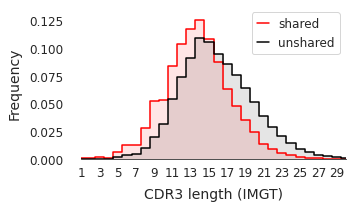

In [164]:
x = len_df.index.values
labels = len_df.columns.values
ys = [list(len_df[l]) for l in labels]
colors = ['r', 'k']

step(x, ys, colors=colors, labels=labels, xlim=[1, 30], xtick_interval=2,
     figsize=(5, 3), linewidth=1.5, xlabel='CDR3 length (IMGT)', show_legend=True,
      figfile='../make_figures/figures/327059_shared_CDR3len_step-plot.pdf'
    )

In [112]:
D327059_2016_total=9281663
D327059_2020_total=3619333
D327059_shared=len(shared)


In [113]:
(D327059_2016_total-D327059_shared)

9113722

In [114]:
(D327059_2020_total-D327059_shared)

3451392

In [115]:
D327059_shared

167941

In [116]:
(D327059_shared/(D327059_2016_total))*100

1.809384805287587

# Turnover rate

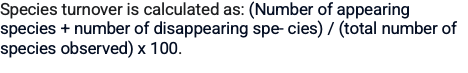

In [42]:
#D103 turnover rate
num_appearing=D103_2021_total-D103_shared
num_disappearing=+D103_2016_total-D103_shared
total_number_obs=D103_2021_total+D103_2016_total

D103_turnover_rate=((num_appearing+num_disappearing)/total_number_obs)*100

In [43]:
D103_turnover_rate

98.52550116411939

In [44]:
#D327059 turnover rate
num_appearing=D327059_2020_total-D327059_shared
num_disappearing=+D327059_2016_total-D327059_shared
total_number_obs=D327059_2020_total+D327059_2016_total

D327059_turnover_rate=((num_appearing+num_disappearing)/total_number_obs)*100

In [45]:
D327059_turnover_rate

97.39646458304459

In [47]:
(98.5+97.4)/2

97.95

In [50]:
(D103_shared/(D103_2016_total))*100

1.1253858938427332

In [70]:
data=[{'Donor': 'D103', 'turnover rate': D103_turnover_rate, 'sample': 'total'}, 
      {'Donor': 'D327059', 'turnover rate': D327059_turnover_rate, 'sample': 'total'}]

In [71]:
df=pd.DataFrame(data)

<ipython-input-85-cb9d122bb562>:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x='sample', y='turnover rate', ax=ax, palette=['0.25', '0.25', '0.25', '0.25'])
<ipython-input-85-cb9d122bb562>:6: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.stripplot(data=df, x='sample', y='turnover rate', ax=ax, palette=['0.25', '0.25', '0.25', '0.25'])


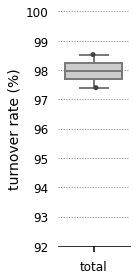

In [85]:
plt.figure(figsize=(2,4))
ax=sns.boxplot(data=df, x='sample', y='turnover rate',fliersize=0, saturation=1.,
            palette=['0.8', '0.9'],
            hue_order=['All', 'IgM (<2 mutations)', 'IgM (2+ mutations)', 'IgG'],
            linewidth=2)
sns.stripplot(data=df, x='sample', y='turnover rate', ax=ax, palette=['0.25', '0.25', '0.25', '0.25'])
ax.set_ylim(92,100)
for y in np.arange(93, 101, 1):
    ls = ':'
    lw = 1
    alpha=0.5
    plt.axhline(y=y, xmin=0, xmax=10, linewidth=lw, color='k', linestyle=ls, alpha=alpha)
    
ax.set_ylabel('turnover rate (%)', fontsize=14)
ax.set_xlabel('', fontsize=14)
# axis tick appearance
ax.tick_params(axis='x', labelsize=12, direction='out', width=1.5, length=6, pad=8, top=False)
ax.tick_params(axis='y', which='major', labelsize=12, length=6, width=1.25, pad=4, right=False, left=False)
# remove top, left and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig('../make_figures/figures/turnover_rate.pdf', dpi=300)
plt.show()